In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
import random
#from tensorflow import keras
#from tensorflow.keras import layers
import pandas as pd

import keras
import keras.backend
from keras import layers
from keras import models
from keras import optimizers
import keras.utils

print(tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math
import time
import h5py
import sklearn
from sklearn.utils import shuffle

import os

/home/schubert/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/schubert/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/schubert/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/schubert/anaconda3/lib/python3.7/site-packages/tensorflow/python/frame

1.13.1


In [2]:
grid = 16
# training data : 10,000 signal samples and 10,000 bkg samples
data= np.load('data/ShowJetsData_full.npz')

In [3]:
data_dic={key : data[key]  for key in data.keys()}
n_data=len(data_dic['labels'])
# one-Hot encode the labels 
lal=np.arange(2)
data_dic['labels']=np.array([[ele[0],np.sum(ele[1:])] for ele in data_dic['labels']]).astype(int)
[key for key in data_dic.keys()]

['jetImages',
 'jetPt',
 'jetEta',
 'jetPhi',
 'tau21',
 'chMult',
 'neutMult',
 'phoMult',
 'eleMult',
 'muMult',
 'jetpull',
 'labels']

In [4]:
# features will be loaded into X
features=['jetImages','jetPt','jetEta','jetPhi','tau21','chMult','neutMult','phoMult','eleMult','muMult','jetpull']
# label into Y
label=['labels']

In [5]:
X=[data_dic[key] for key in features]
Y=[data_dic[key] for key in label]
# Reshape pictures for CNN
X[0]=X[0].reshape(n_data, grid, grid, 1)

In [6]:
random.seed(1)
ind_sig_inb=np.argwhere(Y[0][:,1]==1)[:,0]
ind_bkg=np.argwhere(Y[0][:,0]==1)[:,0]
ind_sig=random.choices(ind_sig_inb,k=len(ind_bkg))
X_sig=[ele[ind_sig] for ele in X]
Y_sig=[ele[ind_sig] for ele in Y]
X_bkg=[ele[ind_bkg] for ele in X]
Y_bkg=[ele[ind_bkg] for ele in Y]

In [7]:
# Give train test split percentage
split=0.9
random.seed(2)
ind_sig=np.random.permutation(len(X_sig[0]))
ind_bkg=np.random.permutation(len(X_bkg[0]))
ind_sig_train=ind_sig[:int(split*len(X_sig[0]))]
ind_sig_test=ind_sig[int(split*len(X_sig[0])):]
ind_bkg_train=ind_sig[:int(split*len(X_sig[0]))]
ind_bkg_test=ind_sig[int(split*len(X_sig[0])):]
X_train=[np.concatenate((X_sig[i][ind_sig_train],X_bkg[i][ind_bkg_train]),axis=0) for i in range(len(X_sig))]
Y_train=[np.concatenate((Y_sig[i][ind_sig_train],Y_bkg[i][ind_bkg_train]),axis=0) for i in range(len(Y_sig))]
X_test=[np.concatenate((X_sig[i][ind_sig_test],X_bkg[i][ind_bkg_test]),axis=0) for i in range(len(X_sig))]
Y_test=[np.concatenate((Y_sig[i][ind_sig_test],Y_bkg[i][ind_bkg_test]),axis=0) for i in range(len(Y_sig))]

In [8]:
dim=[1 if ele[0].shape==() else ele[0].shape[0] for ele in X_train]
for i in range(1,len(X_train)):
    X_train[i]=X_train[i].reshape(len(X_train[i]),dim[i])
for i in range(1,len(X_test)):
    X_test[i]=X_test[i].reshape(len(X_test[i]),dim[i])

In [9]:
minn=np.min(X_train[i])
maxx=np.max(X_train[i])
X_train[0]=(X_train[0]-minn)/(maxx-minn)

In [10]:
for i in range(1,len(X_train)):
    minn=np.min(X_train[i],axis=0)
    maxx=np.max(X_train[i],axis=0)
    X_train[i]=(X_train[i]-minn)/(maxx-minn)

In [11]:
minn=np.min(X_test[i])
maxx=np.max(X_test[i])
X_test[0]=(X_test[0]-minn)/(maxx-minn)

In [12]:
for i in range(1,len(X_test)):
    minn=np.min(X_test[i],axis=0)
    maxx=np.max(X_test[i],axis=0)
    X_test[i]=(X_test[i]-minn)/(maxx-minn)

In [13]:
# !ls training
best_model = keras.models.load_model('model/CNN_full.h1')
best_model.summary()
results = best_model.evaluate(X_test, Y_test)
print(results)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 16, 16, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 16, 16, 32)   832         input_11[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 16, 16, 32)   9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 16, 16, 32)   9248        conv2d_2[0][0]         

In [14]:
predict = best_model.predict(X_test)

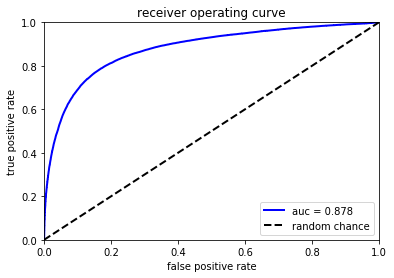

In [15]:
# Plot ROC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test[0][:,1], predict[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, color='b', label='auc = %.3f' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
plt.xlim([0, 1.0])
plt.ylim([0, 1.0])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating curve')
plt.legend(loc="lower right")
plt.show()

In [16]:
import innvestigate
import innvestigate.utils as iutils

In [17]:
def build_model_lrp():
    input1 = layers.Input(shape = (2058,))
    x = layers.Dense(256, activation='relu')(input1)
    output = layers.Dense(2, activation='softmax')(x)
    model = models.Model(inputs=input1, outputs=output)
    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['binary_crossentropy', 'accuracy'])
    return model

In [18]:
# Split Model into Convolutional and dense part 
conv_model=models.Model(best_model.input,best_model.layers[-3].output)
dense_model = build_model_lrp()
for i in range(-1,-4,-1):
    print('Transferring layer',i)
    weight=best_model.layers[i].get_weights()
    dense_model.layers[i].set_weights(weight)

Transferring layer -1
Transferring layer -2
Transferring layer -3


In [19]:
# n_train=len(X_train[1])
# # Reshape tensors for LRP
# # note all inputs that have dim>1 have to reshaped to (1,dim)
# X_lrp=[[X_train[i][j] for i in range(len(features))] for j in range(n_train)]
# for i in range(n_train):
#     X_lrp[i][0]=X_lrp[i][0].reshape(1,grid,grid,1)
# #    X_lrp[i][1]=X_lrp[i][1].reshape(1,2)

In [19]:
n_test=len(X_test[1])
# Reshape tensors for LRP
# note all inputs that have dim>1 have to reshaped to (1,dim)
X_lrp=[[X_test[i][j] for i in range(len(features))] for j in range(n_test)]
for i in range(n_test):
    X_lrp[i][0]=X_lrp[i][0].reshape(1,grid,grid,1)
#    X_lrp[i][1]=X_lrp[i][1].reshape(1,2)

In [20]:
# Build intermediate input for dense layers
X_dense=[conv_model.predict(X_lrp[i]) for i in range(n_test)]

In [53]:
# Our divided model and full model give same output
print(dense_model.predict(X_dense[0]))
print(best_model.predict(X_lrp[0]))

[[0.23649888 0.7635011 ]]
[[0.23649888 0.7635011 ]]


In [22]:
bmodel_ws = iutils.keras.graph.model_wo_softmax(best_model)
dmodel_ws = iutils.keras.graph.model_wo_softmax(dense_model)

## Test LRP on Full Model

In [50]:
# Select Image (pick some number from 0 to 19999)
imgnum=1
# Creating an analyzer
#lrp_analyzer = innvestigate.create_analyzer("lrp.z", bmodel_ws)
lrp_analyzer = innvestigate.create_analyzer("lrp.z_IB", bmodel_ws)
#lrp_analyzer = innvestigate.create_analyzer("lrp.epsilon", bmodel_ws)
#lrp_analyzer = innvestigate.create_analyzer("lrp.epsilon_IB", bmodel_ws)
#lrp_analyzer = innvestigate.create_analyzer("lrp.alpha_2_beta_1", bmodel_ws)
#lrp_analyzer = innvestigate.create_analyzer("lrp.alpha_2_beta_1_IB", bmodel_ws)
#lrp_analyzer = innvestigate.create_analyzer("lrp.alpha_1_beta_0", bmodel_ws)
#lrp_analyzer = innvestigate.create_analyzer("lrp.alpha_1_beta_0_IB", bmodel_ws)
#lrp_analyzer = innvestigate.create_analyzer("lrp.w_square", bmodel_ws)
# Applying the analyzer
analysis1 = lrp_analyzer.analyze(X_lrp[imgnum])
# # Displaying one result
# plt.imshow(analysis[0].reshape(grid, grid), cmap='RdBu', origin = 'low', interpolation='nearest')
# plt.colorbar()
# plt.clim(-0.6, 0.6)
# plt.show()

In [51]:
test=[np.sum(ele) for ele in analysis1]/np.max(bmodel_ws.predict(X_lrp[imgnum])[0])
print(test)
np.sum(test)

[   0.          151.38747     -36.839973      0.45340058 -304.22818
   96.427055     28.651556     76.41347       0.            0.
  -11.26477   ]


1.0000315

In [49]:
[np.sum(ele) for ele in analysis1]

[0.0,
 1.7392411,
 -0.13439694,
 -0.00155379,
 -0.92352307,
 0.25763828,
 0.02639192,
 0.59868914,
 0.0,
 0.0,
 -0.04020548]

In [45]:
ana_sum[11746]

array([ 0.        , 11.377038  , -2.339252  , -1.0995998 , -2.8752303 ,
       -1.9434168 , -0.8993499 , -1.2107408 ,  0.        ,  0.        ,
       -0.60443836], dtype=float32)

In [34]:
#plot output signal and background
toc = time.time()

display = X_lrp
analysis = [lrp_analyzer.analyze(display[i]) for i in range(n_test)]

tic = time.time()

print('\n time = \n', tic-toc)


 time = 
 169.76690983772278


In [44]:
ana_sum=np.array([[np.sum(ele) for ele in ana] for ana in analysis])
model_out=np.max(bmodel_ws.predict(X_test),axis=1)
# for i in range(n_test):
#     ana_sum[i]=ana_sum[i]/model_out[i]

### LRP.Z

In [69]:
#np.mean(ana_sum,axis=0) # This was with lrp.z
# w bias
#[0,0.15245031,-0.03593288,0.05130995,-0.04468057,0.2581704,0.2087618,0.1450953,-0.17734969,0.01397072,0.11162304]
# w/o bias
#[0.,9.520095,-2.535502,-0.88078153,-12.137775,3.0656643,0.49566087,3.0224466,0.6144052,-0.02010816,-0.14410827]

### LRP.epsilon

In [80]:
#np.mean(ana_sum,axis=0) # This was with lrp.eps
# w bias
#[0,0.14857137,-0.03649887,0.05139174,-0.02610694,0.25736007,0.20831804,0.1450683,-0.17557515,0.01397153,0.11133406]
# w/o bias
#[0,8.182605,-2.3030596,-0.6515178,-11.467334,3.2472591,0.57624966,3.1228225,0.414409,-0.01806587,-0.10341328]

### lrp.alpha_2_beta_1

In [ ]:
np.mean(ana_sum,axis=0) # This was with lrp.alpha beta
# w bias
#
# w/o bias
#

### LRP.alpha_1_beta_0

In [ ]:
#np.mean(ana_sum,axis=0) # This was with lrp. alpha beta
# w bias
#
# w/o bias
#

### lrp.w_square

In [ ]:
#np.mean(ana_sum,axis=0) # This was with lrp.z
# w bias
#
# w/o bias
#

## Test Only Dense Layers with LRP

In [103]:
# Select Image (pick some number from 0 to 19999)
imgnum=0
# Creating an analyzer
#lrp_analyzer = innvestigate.create_analyzer("lrp.z", dmodel_ws)
#lrp_analyzer = innvestigate.create_analyzer("lrp.z_IB", dmodel_ws)
#lrp_analyzer = innvestigate.create_analyzer("lrp.epsilon", dmodel_ws)
#lrp_analyzer = innvestigate.create_analyzer("lrp.epsilon_IB", dmodel_ws)
#lrp_analyzer = innvestigate.create_analyzer("lrp.alpha_2_beta_1", dmodel_ws)
#lrp_analyzer = innvestigate.create_analyzer("lrp.alpha_2_beta_1_IB", dmodel_ws)
#lrp_analyzer = innvestigate.create_analyzer("lrp.alpha_1_beta_0", dmodel_ws)
#lrp_analyzer = innvestigate.create_analyzer("lrp.alpha_1_beta_0_IB", dmodel_ws)
lrp_analyzer = innvestigate.create_analyzer("lrp.w_square", dmodel_ws)
# Applying the analyzer
analysis = lrp_analyzer.analyze(X_dense[imgnum])
# # Displaying one result
# plt.imshow(analysis[0].reshape(grid, grid), cmap='RdBu', origin = 'low', interpolation='nearest')
# plt.colorbar()
# plt.clim(-0.6, 0.6)
# plt.show()

In [104]:
[np.sum(analysis[0][:2048]),analysis[0][2048],analysis[0][2049],analysis[0][2050],analysis[0][2051],analysis[0][2052],analysis[0][2053],analysis[0][2054],analysis[0][2055],analysis[0][2056],analysis[0][2057]]/np.max(dmodel_ws.predict(X_dense[imgnum])[0])

array([5.3649610e-01, 2.7217567e-01, 2.0156763e-03, 1.1242766e-04,
       4.4729367e-02, 5.0941583e-02, 8.8997893e-03, 2.3588330e-02,
       1.1652018e-02, 4.8812993e-02, 5.7618663e-04], dtype=float32)

In [105]:
#plot output signal and background
toc = time.time()

analysis = [lrp_analyzer.analyze(X_dense[i]) for i in range(n_test)]

tic = time.time()

print('\n time = \n', tic-toc)


 time = 
 80.83300423622131


In [106]:
ana_sum=np.array([[np.sum(ana[0][:2048]),ana[0][2048],ana[0][2049],ana[0][2050],ana[0][2051],ana[0][2052],ana[0][2053],ana[0][2054],ana[0][2055],ana[0][2056],ana[0][2057]] for ana in analysis])
model_out=[np.max(dmodel_ws.predict(X_dense[i]),axis=1) for i in range(n_test)]
for i in range(n_test):
    ana_sum[i]=ana_sum[i]/model_out[i]

### LRP.Z

In [69]:
#np.mean(ana_sum,axis=0) # This was with lrp.z
# w bias
#[0,0.15245031,-0.03593288,0.05130995,-0.04468057,0.2581704,0.2087618,0.1450953,-0.17734969,0.01397072,0.11162304]
# w/o bias
#[0.,9.520095,-2.535502,-0.88078153,-12.137775,3.0656643,0.49566087,3.0224466,0.6144052,-0.02010816,-0.14410827]

### LRP.epsilon

In [80]:
#np.mean(ana_sum,axis=0) # This was with lrp.eps
# w bias
#[0,0.14857137,-0.03649887,0.05139174,-0.02610694,0.25736007,0.20831804,0.1450683,-0.17557515,0.01397153,0.11133406]
# w/o bias
#[0,8.182605,-2.3030596,-0.6515178,-11.467334,3.2472591,0.57624966,3.1228225,0.414409,-0.01806587,-0.10341328]

### lrp.alpha_2_beta_1

In [102]:
#np.mean(ana_sum,axis=0) # This was with lrp.alpha beta
# w bias
#[0,-0.01390401,-0.08162314,-0.04154111,-2.587854,-0.89187473,-0.29644567,-0.7046687,0.0259149,0.0827094,-0.12362336]
# w/o bias
#[0,0.2162189,-0.2908635,0.01094637,0.1206545,0.40172812,0.09193143,0.46828508,0.01128768,0.01890007,-0.04908316]

### LRP.alpha_1_beta_0

In [107]:
#np.mean(ana_sum,axis=0) # This was with lrp. alpha beta
# w bias
#[0,0.13975509,0.05845137,0.02391208,0.35817838,0.17191088,0.04670334,0.1603134,0.0109716,0.00353415,0.04965757]
# w/o bias
#[0,0.18698053,0.09168747,0.0317525,0.19809927,0.19378904,0.0452356,0.19756816,0.00735529,0.00591376,0.04160213]

### lrp.w_square

In [109]:
#np.mean(ana_sum,axis=0) # This was with lrp.w_square
# w/o bias
# [0.53547615,0.27360874,0.0020234047,0.00011119822,0.044179935,0.051342096,0.0090042530,0.023703365,0.011661683,0.048817620,0.00056479638]